In [15]:
%env CONDA_PREFIX

'C:\\Users\\ai47\\anaconda3\\envs\\lstm'

In [16]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import sys
print(sys.version)
from tensorflow import keras 
print(keras.__version__)

3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
2.2.4-tf


- Python version 3.6이어야 함.

# LSTM

In [19]:
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding #놓쳤다.
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import sequence

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [20]:
# data 불러오기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인
category = np.max(Y_train) + 1
print(category, '카테고리')
print(len(X_train), '학습용 뉴스 기사')
print(len(X_test), '테스트용 뉴스 기사')
print( X_train[0] )
print( len(X_train[0]) )

46 카테고리
8982 학습용 뉴스 기사
2246 테스트용 뉴스 기사
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
87


In [21]:
# 데이터 전처리
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)
print( len(X_train[0]) )
print( len(x_train[0]) )

y_train = to_categorical(Y_train)
y_test = to_categorical(Y_test)
print(y_train.shape, y_test.shape)

87
100
(8982, 46) (2246, 46)


In [22]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   2,   2,   8,  43,  10, 447,   5,  25, 207, 270,   5,   2,
       111,  16, 369, 186,  90,  67,   7,  89,   5,  19, 102,   6,  19,
       124,  15,  90,  67,  84,  22, 482,  26,   7,  48,   4,  49,   8,
       864,  39, 209, 154,   6, 151,   6,  83,  11,  15,  22, 155,  11,
        15,   7,  48,   9,   2,   2, 504,   6, 258,   6, 272,  11,  15,
        22, 134,  44,  11,  15,  16,   8, 197,   2,  90,  67,  52,  29,
       209,  30,  32, 132,   6, 109,  15,  17,  12])

In [23]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [24]:
x_test[0]

array([  5,   2,   7, 748,  48,   9,   2,   7, 207,   2, 966,   2, 793,
        97, 133, 336,   7,   4, 493,  98, 273, 104, 284,  25,  39, 338,
        22, 905, 220,   2, 644,  59,  20,   6, 119,  61,  11,  15,  58,
       579,  26,  10,  67,   7,   4, 738,  98,  43,  88, 333, 722,  12,
        20,   6,  19, 746,  35,  15,  10,   9,   2, 855, 129, 783,  21,
         4,   2, 244, 364,  51,  16, 299, 452,  16, 515,   4,  99,  29,
         5,   4, 364, 281,  48,  10,   9,   2,  23, 644,  47,  20, 324,
        27,  56,   2,   2,   5, 192, 510,  17,  12])

In [25]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
#adam optimizer
seed=0
np.random.seed(seed)
tf.compat.v1.set_random_seed(seed)

# 모델의 설정
model = Sequential()
model.add( Embedding(1000, 100))
model.add( LSTM(100, activation='tanh'))
model.add( Dense(46, activation='softmax')  )

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [28]:
# 모델 학습
train_history = model.fit(x_train, y_train, batch_size=100,
                         epochs=30, validation_data=(x_test, y_test))

Train on 8982 samples, validate on 2246 samples
Epoch 1/30
8982/8982 [==============================] - 13s 1ms/sample - loss: 2.6134 - accuracy: 0.3426 - val_loss: 2.4030 - val_accuracy: 0.3620
Epoch 2/30
8982/8982 [==============================] - 11s 1ms/sample - loss: 2.1107 - accuracy: 0.4690 - val_loss: 2.0097 - val_accuracy: 0.5049
Epoch 3/30
8982/8982 [==============================] - 10s 1ms/sample - loss: 1.9940 - accuracy: 0.5066 - val_loss: 2.0075 - val_accuracy: 0.5107
Epoch 4/30
8982/8982 [==============================] - 10s 1ms/sample - loss: 1.8306 - accuracy: 0.5405 - val_loss: 1.7540 - val_accuracy: 0.5606
Epoch 5/30
8982/8982 [==============================] - 11s 1ms/sample - loss: 1.6833 - accuracy: 0.5729 - val_loss: 1.6953 - val_accuracy: 0.5739
Epoch 6/30
8982/8982 [==============================] - 10s 1ms/sample - loss: 1.7340 - accuracy: 0.5573 - val_loss: 1.7603 - val_accuracy: 0.5352
Epoch 7/30
8982/8982 [==============================] - 10s 1ms/sample

In [29]:
# 학습셋 정확도 
print('Train accuracy: %.4f' % (model.evaluate(x_train, y_train)[1]))

8982/8982 [==============================] - 6s 613us/sample - loss: 0.5393 - accuracy: 0.8656
Train accuracy: 0.8656


In [30]:
# 테스트셋 정확도 
print('Test accuracy: %.4f' % (model.evaluate(x_test, y_test)[1]))

2246/2246 [==============================] - 1s 604us/sample - loss: 1.1991 - accuracy: 0.7262
Test accuracy: 0.7262


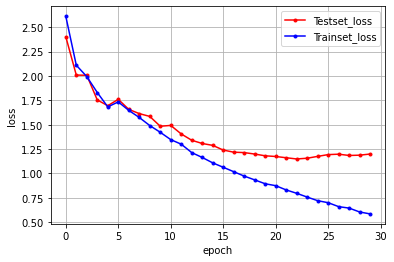

In [31]:
# 오차 비교
vloss = train_history.history['val_loss']
loss = train_history.history['loss']

x_len = np.arange(len(loss))
plt.plot(x_len, vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

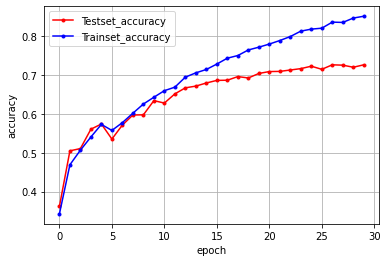

In [32]:
# 정확도
vacc = train_history.history['val_accuracy']
acc = train_history.history['accuracy']

x_len = np.arange(len(acc))
plt.plot(x_len, vacc, marker='.', c='red', label='Testset_accuracy')
plt.plot(x_len, acc, marker='.', c='blue', label='Trainset_accuracy')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()